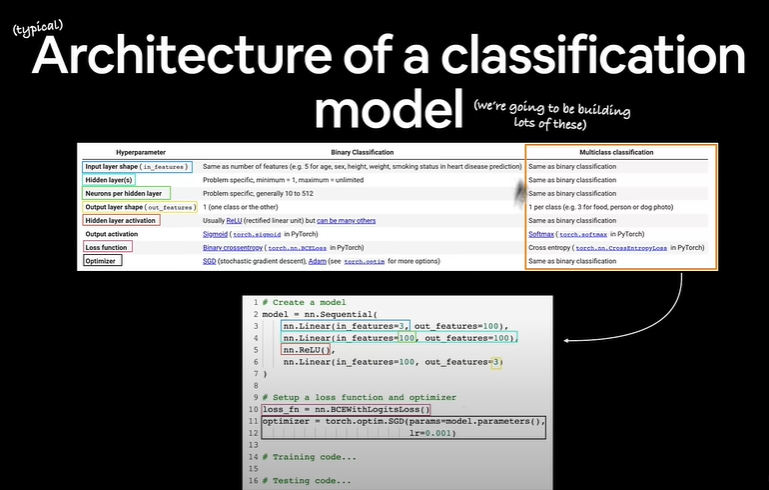

# Neural network classification


## Make classification data and get it ready

In [ ]:
import sklearn


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of X : ", X[:5])
print(f"first 5 samples of y : ", y[:5])

first 5 samples of X :  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y :  [1 1 1 1 0]


In [ ]:
# Make Dataframe of circle data

import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0] , "X2" : X[:,1] , "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

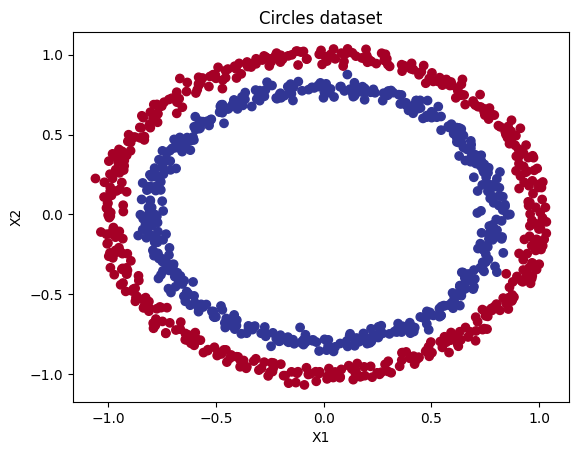

In [ ]:
# visualize
import matplotlib.pyplot as plt

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circles dataset')
plt.show()

### check input and output shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]

X_sample , X_sample.shape , y_sample,y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

### turn data into tensors

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X.dtype

torch.float32

In [ ]:
torch.manual_seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## Build Model

### importation and device agnoustic code

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

## creating model
* 1. subclass `nn.module` (almost all models inPytorch subbclass `nn.Module`).
* 2. create 2 `nn.Linear` layers that are capable of handling the shapes of our data.
* 3. defines a `forward()` method that outlines the forward pass of the model.
* 4. Instantiate an instance of our model class and send it to the target `device`

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2,out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5,out_features = 1)
  def forward(self,x):
    return self.layer_2(self.layer_1(x))


model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# let's replicate our model using nn.Sequential
model_0 = nn.Sequential(nn.Linear(in_features = 2, out_features = 5),
                       nn.Linear(in_features = 5 , out_features = 1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(len(untrained_preds),untrained_preds.shape,untrained_preds[:10],y_test[:10])

200 torch.Size([200, 1]) tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0') tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
# loss function and optimizer
loss_fn = torch.nn.BCELoss() #requires inputs to have gone through the sigmoid activation function prior to input to BCEloss
loss_fn = torch.nn.BCEWithLogitsLoss()  # = sigmoid activation built in

optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1)


In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# calculating accuracy.

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


## Train Model

### going from raw logits -> prediction probabilities -> prediction labels

In [ ]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
# use the sigmoid activation function on our model logits to turn them in pred probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [ ]:
# find the y_pred_probs
y_preds = torch.round(y_pred_probs)

# in full(logits->pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

## Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# put data into target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ### training
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits)) #nn.BCELoss expects pred probs as input
  loss = loss_fn(y_logits,y_train) #nn.BCEwithlogits expects raw logits as input
  acc = accuracy_fn(y_true = y_train,y_pred = y_pred)

  # optimizer zer grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

    # print
    if epoch % 10 == 0:
      print(f"epoch:{epoch}|Loss:{loss:.5f}|acc:{acc:.2f}% | test loss :{test_loss:.5f} | tess accuracy :{test_acc}%")


epoch:0|Loss:0.69796|acc:51.88% | test loss :0.69440 | tess accuracy :57.99999999999999%
epoch:10|Loss:0.69590|acc:51.25% | test loss :0.69305 | tess accuracy :53.0%
epoch:20|Loss:0.69490|acc:51.62% | test loss :0.69254 | tess accuracy :49.5%
epoch:30|Loss:0.69435|acc:51.12% | test loss :0.69236 | tess accuracy :49.5%
epoch:40|Loss:0.69401|acc:50.88% | test loss :0.69232 | tess accuracy :51.0%
epoch:50|Loss:0.69378|acc:50.25% | test loss :0.69234 | tess accuracy :50.0%
epoch:60|Loss:0.69362|acc:50.00% | test loss :0.69239 | tess accuracy :51.5%
epoch:70|Loss:0.69351|acc:50.25% | test loss :0.69246 | tess accuracy :51.0%
epoch:80|Loss:0.69342|acc:49.88% | test loss :0.69254 | tess accuracy :50.0%
epoch:90|Loss:0.69336|acc:49.88% | test loss :0.69262 | tess accuracy :53.0%


## 4.Make predictions

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download!")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary




Download helper_functions.py


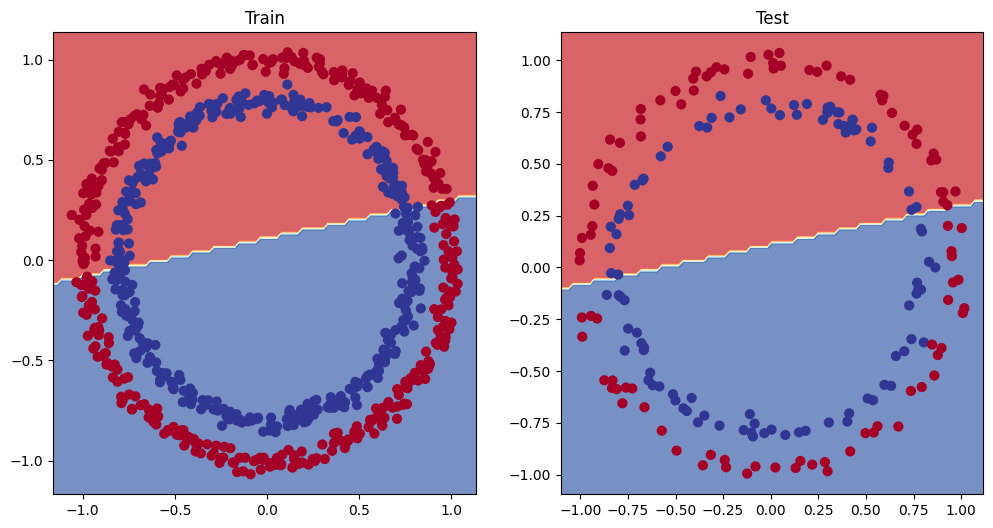

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## Improving our model
* adding more layers - give more chanches to learn pattern of the data
* adding more hidden units - go from 5 hidden unit to 10 hidden unit
* changing the learning rate
* change the loss function


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10 , out_features = 1)
  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [ ]:
model_1= CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

# Training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data on the target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  #training
  model_1.train()

  # forward_pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # loss and accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

  # loss backward
  loss.backward()

  # optimizer step (gradient descent)
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate loss
    test_loss = loss_fn(test_logits,y_test).squeeze()
    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)

    # print
    if epoch % 100 == 0:
      print(f"epoch:{epoch}|Loss:{loss:.5f}|acc:{acc:.2f}% | test loss :{test_loss:.5f} | tess accuracy :{test_acc}%")


epoch:0|Loss:0.69396|acc:50.88% | test loss :0.69261 | tess accuracy :51.0%
epoch:100|Loss:0.69307|acc:51.25% | test loss :0.69614 | tess accuracy :46.5%
epoch:200|Loss:0.69301|acc:50.00% | test loss :0.69426 | tess accuracy :47.0%
epoch:300|Loss:0.69316|acc:49.50% | test loss :0.69367 | tess accuracy :51.5%
epoch:400|Loss:0.69306|acc:48.25% | test loss :0.69475 | tess accuracy :46.5%
epoch:500|Loss:0.69316|acc:50.50% | test loss :0.69598 | tess accuracy :47.0%
epoch:600|Loss:0.69335|acc:51.75% | test loss :0.69407 | tess accuracy :52.5%
epoch:700|Loss:0.69333|acc:51.00% | test loss :0.69555 | tess accuracy :49.0%
epoch:800|Loss:0.69325|acc:52.12% | test loss :0.69472 | tess accuracy :50.0%
epoch:900|Loss:0.69347|acc:50.25% | test loss :0.69352 | tess accuracy :49.5%


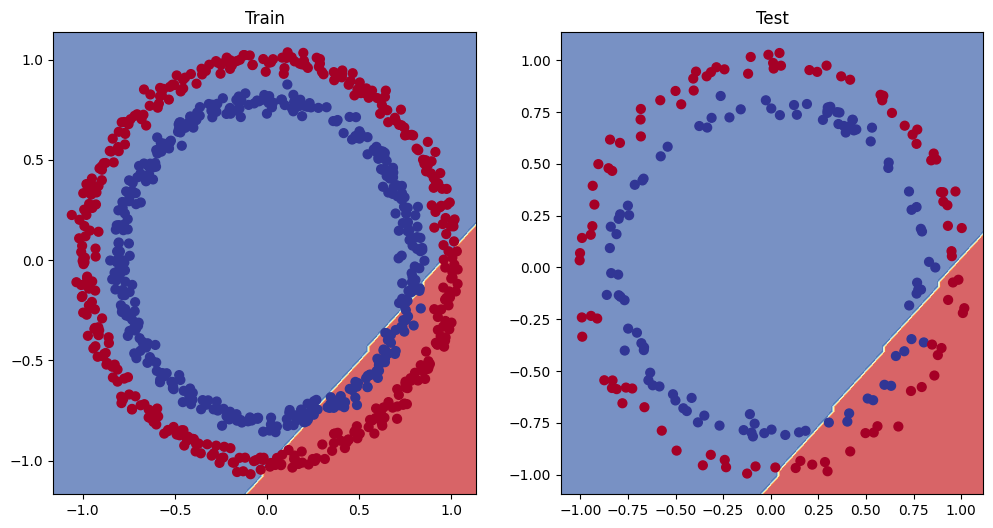

In [ ]:
# plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

### prepare data to see if our model can fit a straight line

In [ ]:
# create some data(same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end =1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:5],y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(0.8*len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]
len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

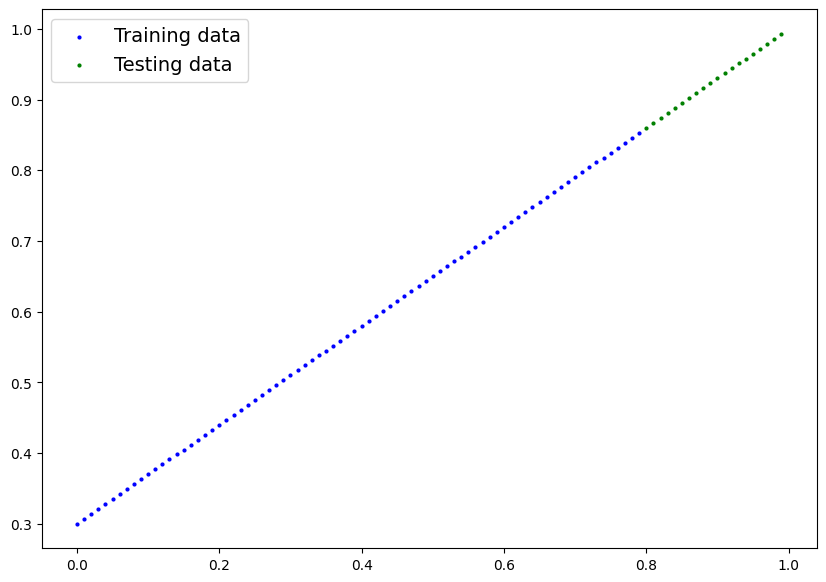

In [ ]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression)

### Adjusting `model 1` to fit a straight line

In [ ]:
# same architecture as model_1 but nn.sequential
model_2 = nn.Sequential(
    nn.Linear(in_features = 1,out_features =10),
    nn.Linear(in_features = 10,out_features = 10),
    nn.Linear(in_features = 10,out_features =1)).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and optimzer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [ ]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
# put data on the target device
X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):
  # training
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  # print
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Loss:{loss:0.5f} | Test loss:{test_loss:0.5f}")

Epoch:0 | Loss:0.75986 | Test loss:0.94965
Epoch:100 | Loss:0.40272 | Test loss:0.54029
Epoch:200 | Loss:0.05876 | Test loss:0.13480
Epoch:300 | Loss:0.01461 | Test loss:0.03342
Epoch:400 | Loss:0.00308 | Test loss:0.00008
Epoch:500 | Loss:0.00309 | Test loss:0.00012
Epoch:600 | Loss:0.00309 | Test loss:0.00018
Epoch:700 | Loss:0.00299 | Test loss:0.00011
Epoch:800 | Loss:0.00299 | Test loss:0.00016
Epoch:900 | Loss:0.00289 | Test loss:0.00011


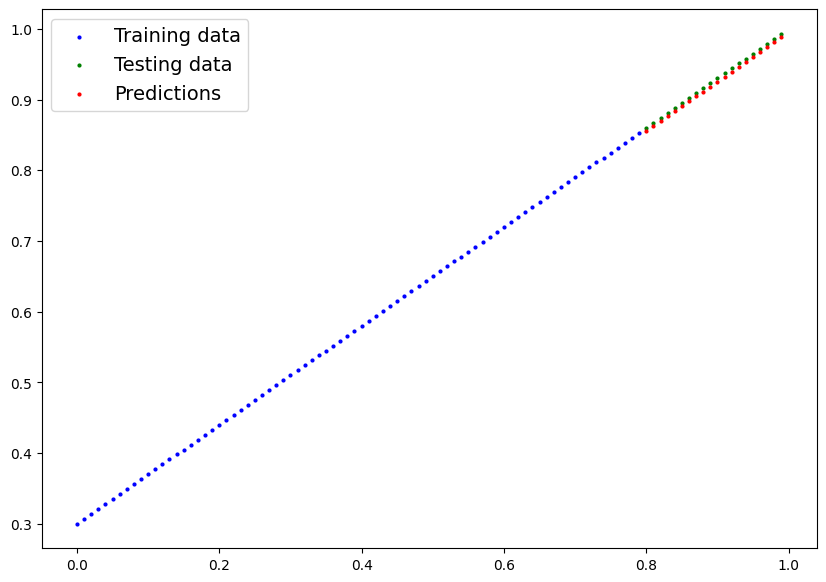

In [ ]:
# visualization
model_2.eval()

# makre predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu() , test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu())

## 6.non linearity

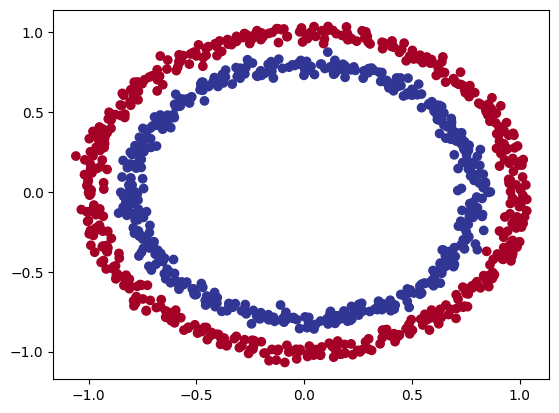

In [ ]:
# recreating non - linear data (red and blue circle)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,noise =0.03,random_state = 42)

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.RdYlBu)

In [ ]:
# conver data to tensors and the to train and test splits

import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### building a  model with non linearity

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features= 10, out_features= 1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [ ]:
model_3 = CircleModelV2().to(device)

In [ ]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

In [ ]:
# random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

epochs = 2000

for epoch in range(epochs):
  model_3.train()

  # 1.Forward pass
  y_logits = model_3(X_train).squeeze()

  # 2.calculate the loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,y_pred=y_pred)

  # 3.optimizer zero grad
  optimizer.zero_grad()

  # 4.Loss Backward
  loss.backward()

  # 5.Step the optimizer
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

# print
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Loss:{loss:0.5f} | Test loss:{test_loss:0.5f} | accuracy : {test_acc : .2f}%")


Epoch:0 | Loss:0.69295 | Test loss:0.69319 | accuracy :  50.00%
Epoch:100 | Loss:0.69115 | Test loss:0.69102 | accuracy :  52.50%
Epoch:200 | Loss:0.68977 | Test loss:0.68940 | accuracy :  55.00%
Epoch:300 | Loss:0.68795 | Test loss:0.68723 | accuracy :  56.00%
Epoch:400 | Loss:0.68517 | Test loss:0.68411 | accuracy :  56.50%
Epoch:500 | Loss:0.68102 | Test loss:0.67941 | accuracy :  56.50%
Epoch:600 | Loss:0.67515 | Test loss:0.67285 | accuracy :  56.00%
Epoch:700 | Loss:0.66659 | Test loss:0.66322 | accuracy :  59.00%
Epoch:800 | Loss:0.65160 | Test loss:0.64757 | accuracy :  67.50%
Epoch:900 | Loss:0.62362 | Test loss:0.62145 | accuracy :  79.00%
Epoch:1000 | Loss:0.56818 | Test loss:0.57378 | accuracy :  86.50%
Epoch:1100 | Loss:0.48153 | Test loss:0.49935 | accuracy :  90.50%
Epoch:1200 | Loss:0.37056 | Test loss:0.40595 | accuracy :  92.00%
Epoch:1300 | Loss:0.25458 | Test loss:0.30333 | accuracy :  96.50%
Epoch:1400 | Loss:0.17180 | Test loss:0.22108 | accuracy :  97.50%
Epoch:1

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9300,  1.5243],
                      [-0.5232,  1.9216],
                      [-0.1549,  0.1427],
                      [-2.3392, -0.1767],
                      [ 0.6889, -2.3658],
                      [ 1.2308, -0.0741],
                      [ 1.6332,  0.1051],
                      [ 0.3410, -0.0998],
                      [ 0.8671,  0.7070],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.2412, -0.9001, -0.2872, -0.4221, -0.5646, -0.5747, -0.7351, -0.4252,
                      -0.2219, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0311, -0.7215,  0.2441, -0.3385, -0.4142, -0.0497, -0.2312,  0.2555,
                       -0.1172, -0.0997],
                      [ 1.5930,  1.8717,  0.1331,  2.1387,  2.0953,  1.0247,  1.5361,  0.0566,
                        0.9802, -0.1927],
                      [-0.3130, -0.124

### Evaluating our model trained with non linear activation functions

In [ ]:
# visualization
model_3.eval()

# makre predictions
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

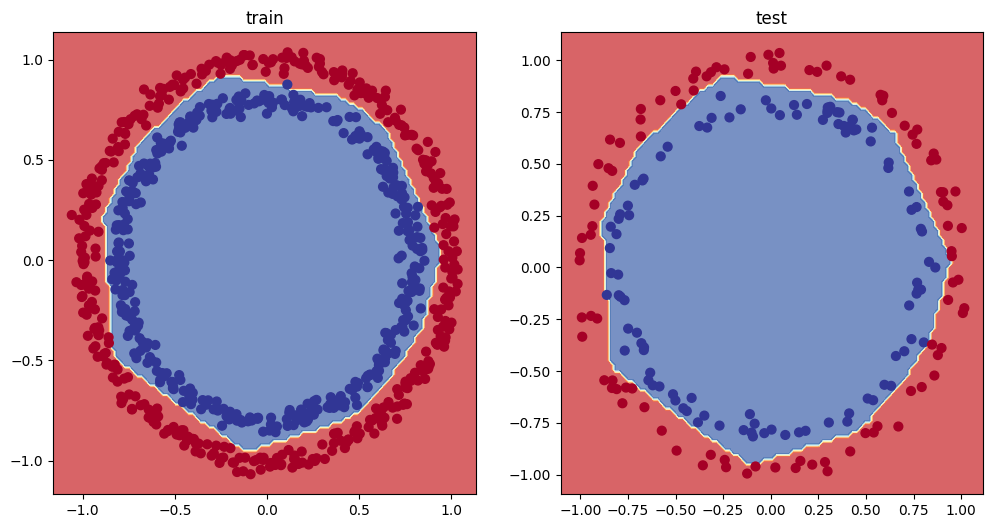

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

### Replicating non linear activation functions


In [ ]:
A = torch.arange(-10,10,1,dtype = torch.float32)
A.dtype

torch.float32

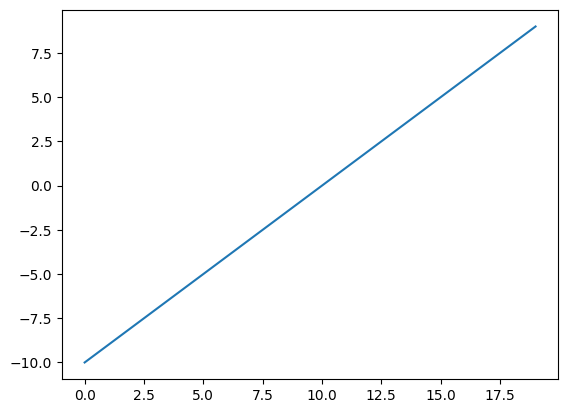

In [ ]:
plt.plot(A);

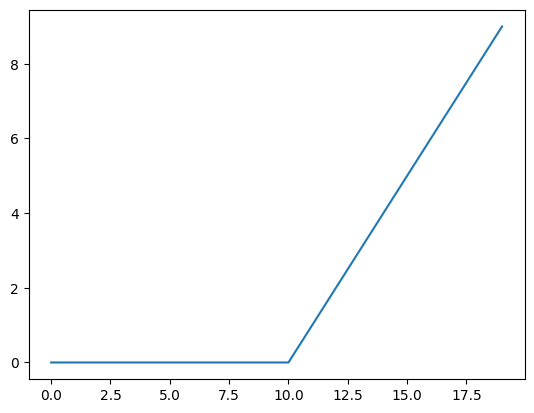

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

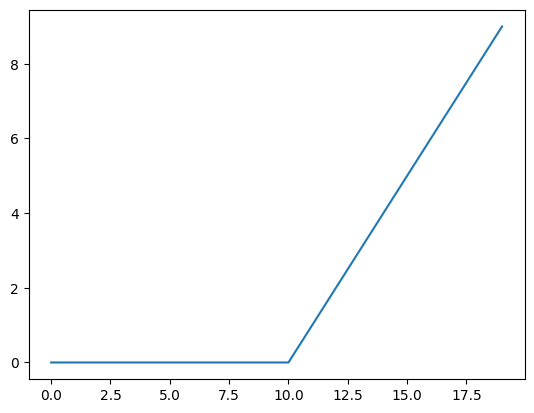

In [ ]:
plt.plot(relu(A))

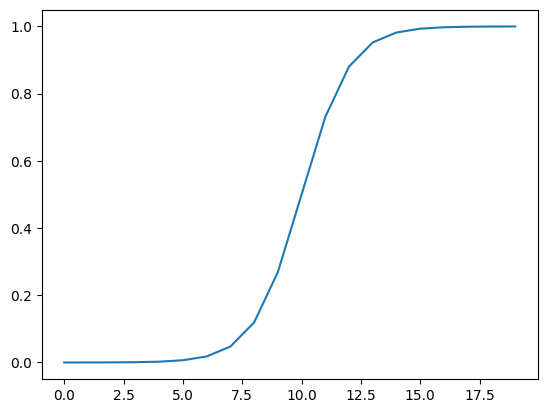

In [ ]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return (1/(1 + torch.exp(-x)))

plt.plot(sigmoid(A))

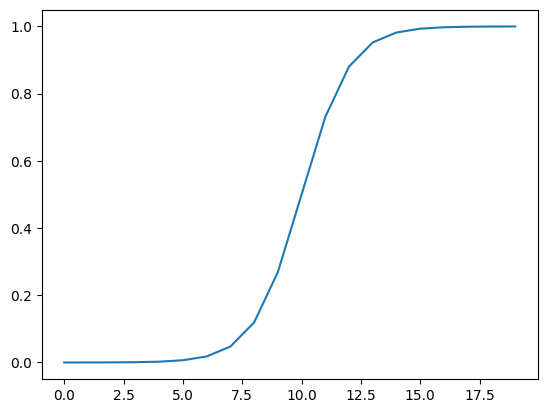

In [ ]:
plt.plot(torch.sigmoid(A))

# Putting it all together in a multiclass classification problem

### creating a toy multiclass datasets

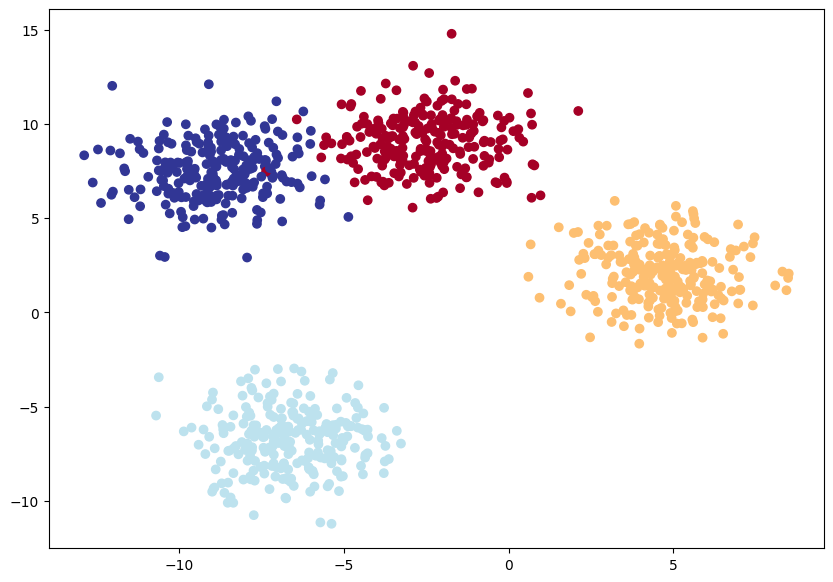

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1.set the hyperparameters for data creation
X_blob , y_blob = make_blobs(n_samples = 1000,n_features = NUM_FEATURES,centers=NUM_CLASSES,
                              cluster_std =1.5,random_state = RANDOM_SEED)

# 2.TURN DATA INTO TENSORS
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3.Split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size= 0.2,random_state=RANDOM_SEED)

# 4.Plot data (visualize,visualize,visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

## Building a multiclass classification  model

In [ ]:
# create device agnoustic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features,out_features = hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features = hidden_units,out_features = hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features = hidden_units,out_features = output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape,y_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(params= model_4.parameters(),lr=0.1)

### getting prediction probabilities for a multiclass pytorch model

* In order to evaluate and train and test our model's outputs(logits) tto prediction probabilities and then to prediction labels.

* Logits -> pred probs -> pred Labels

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4((X_blob_test).to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# convert our model's logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [ ]:
# convert our predict probs to ptred labels
y_preds= torch.argmax(y_pred_probs,dim=1)
y_preds.shape

torch.Size([200])

In [ ]:
y_blob_test.shape

torch.Size([200])

In [ ]:
## traing and testing loop

#random seed setting
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.to(device)

epochs = 100

for epoch in range(epochs):
  model_4.train()
  # training
  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,y_pred = y_pred)

  optimzer.zero_grad()
  loss.backward()
  optimzer.step()

  ### testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_preds = torch.softmax(test_logits,dim =1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_preds)
  if epoch % 10 == 0:
    print(f"epoch:{epoch} | Loss:{loss:.4f} | acc: {acc:.2f} | Test Loss: {test_loss: .4f} | test acc : {test_acc:.2f} %")



epoch:0 | Loss:1.0432 | acc: 65.50 | Test Loss:  0.5786 | test acc : 95.50 %
epoch:10 | Loss:0.1440 | acc: 99.12 | Test Loss:  0.1304 | test acc : 99.00 %
epoch:20 | Loss:0.0806 | acc: 99.12 | Test Loss:  0.0722 | test acc : 99.50 %
epoch:30 | Loss:0.0592 | acc: 99.12 | Test Loss:  0.0513 | test acc : 99.50 %
epoch:40 | Loss:0.0489 | acc: 99.00 | Test Loss:  0.0410 | test acc : 99.50 %
epoch:50 | Loss:0.0429 | acc: 99.00 | Test Loss:  0.0349 | test acc : 99.50 %
epoch:60 | Loss:0.0391 | acc: 99.00 | Test Loss:  0.0308 | test acc : 99.50 %
epoch:70 | Loss:0.0364 | acc: 99.00 | Test Loss:  0.0280 | test acc : 99.50 %
epoch:80 | Loss:0.0345 | acc: 99.00 | Test Loss:  0.0259 | test acc : 99.50 %
epoch:90 | Loss:0.0330 | acc: 99.12 | Test Loss:  0.0242 | test acc : 99.50 %


In [ ]:
# Mkae predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [ ]:
# go from logits to prdiction probabilities
y_pred_probs = torch.softmax(y_logits,dim = 1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [ ]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

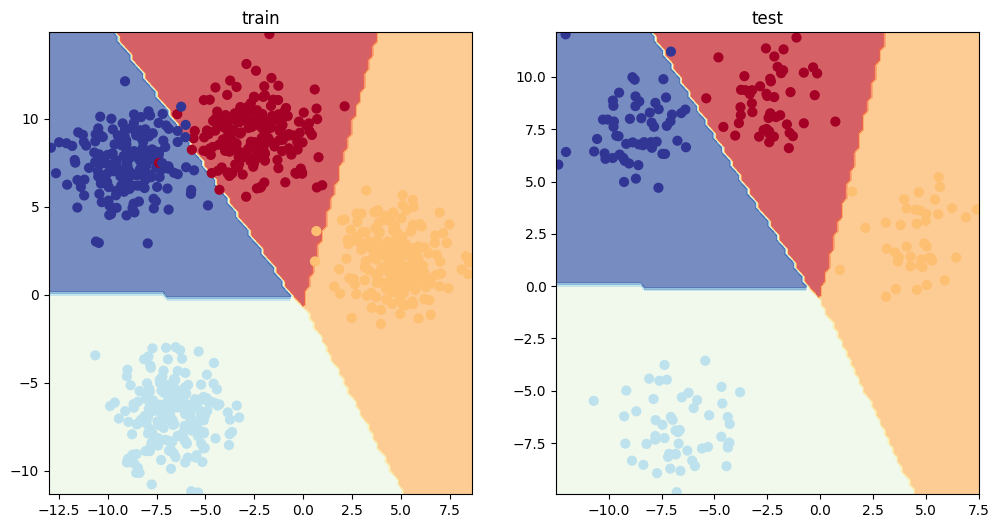

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## a few more classification metrics
* accuracy
* precision
* recall
* f1-score
* confusion matrix
* classification report

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy
torchmetrics_accuracy = Accuracy(task="multiclass",num_classes=4).to(device)
torchmetrics_accuracy(y_preds.to(device),y_blob_test.to(device))

tensor(0.9950, device='cuda:0')